<a href="https://colab.research.google.com/github/sushily1997/U.S._Airline_tweets_Sentiment_Analysis-Support_Vector_Machine-/blob/main/U_S__Airline_tweets_Sentiment_Analysis_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**US Airline Tweets Sentiment Analysis**

---


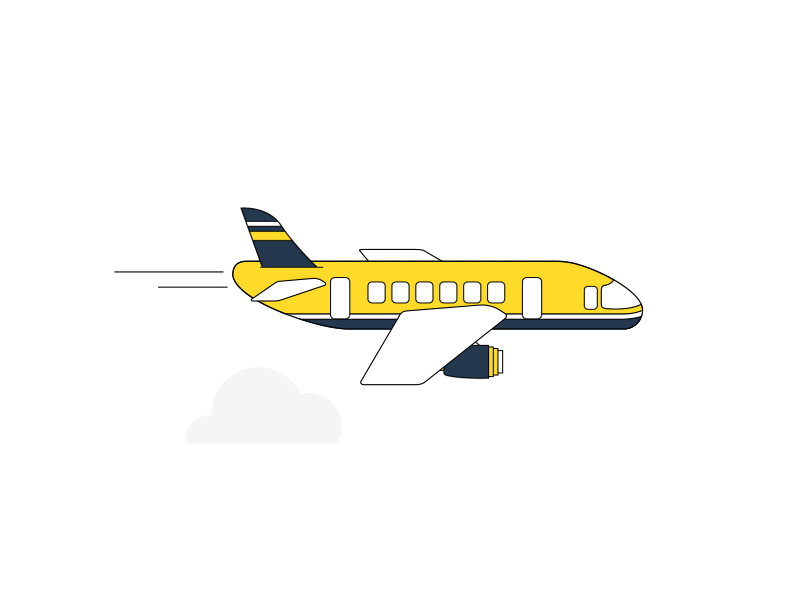

**Objective**

You are given a data of US Airline tweets and their sentiment. The task is to do sentiment analysis about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). 

In [48]:
import pandas as pd
import numpy as np
# %load_ext nb_black 

# library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")


# import Regex, string and unicodedata.
import re, string, unicodedata                          

# import contractions library.
!pip install contractions

import contractions                                     

# import BeautifulSoup.
from bs4 import BeautifulSoup                           

# import Natural Language Tool-Kit.
import nltk                                            

# download Stopwords.
nltk.download('stopwords')                              
nltk.download('punkt')
nltk.download('wordnet')

# import stopwords.
from nltk.corpus import stopwords                       

# import Tokenizer.
from nltk.tokenize import word_tokenize, sent_tokenize  

# library to split data
from sklearn.model_selection import train_test_split, StratifiedKFold

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import wordcloud
import wordcloud
from wordcloud import STOPWORDS
from wordcloud import WordCloud

# remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to get diferent metric scores
from sklearn.metrics import (
    recall_score,
    accuracy_score,
    confusion_matrix,classification_report,
    f1_score,
    precision_score,
    precision_recall_fscore_support
)

# import vectorizers
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# import rfc and cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# import word prepocessors
from nltk.tokenize import word_tokenize 
from nltk.stem import LancasterStemmer, WordNetLemmatizer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df =pd.read_csv(r'../content/drive/MyDrive/Tweets.csv')
texts = [[word.lower() for word in text.split()] for text in df]
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703061e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,5.703011e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,5.703011e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,5.703008e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,5.703008e+17,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,5.703006e+17,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,5.703002e+17,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,5.703000e+17,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,5.702955e+17,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [4]:
df.shape


(14640, 15)

In [5]:
# check the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  float64
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

**Observations:**

There are 15 columns in the dataset.
Half of the columns have null values. Considering both dependent and independent variables not having any null values, we will not do any null value processing.
Most columns in the dataset are of object type.
airline_sentiment is our dependent / target variable.
text column is our independent variable that we will use for analysis.
All other columns will be dropped at a later stage.

In [6]:
#checking null values in our data
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

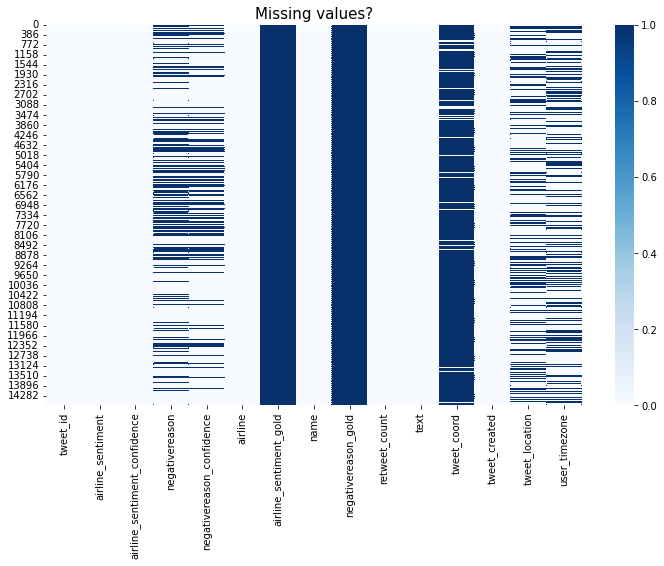

In [7]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(), cmap = "Blues")                       #Visualization of missing value using heatmap
plt.title("Missing values?", fontsize = 15)
plt.show()

Interestingly, the only non-null values of the _gold columns seems to be the same entries for the most part. Meanwhile, there is some but not total overlap between location and timezone in terms of missing values.



**Check for duplicates**

In [8]:
# print the data set information as number of rows and columns
print(f"There are {df.duplicated().sum()} duplicate records in the datset.")  # f-string

There are 36 duplicate records in the datset.


**Drop the duplicates**

In [9]:
# use drop_duplicates
df.drop_duplicates(inplace = True)
# print the data set information as number of rows and columns
print(f"There are {df.duplicated().sum()} duplicate records in the datset.")  # f-string

There are 0 duplicate records in the datset.


**Check the sample data**



In [10]:
# setting the random seed via np.random.seed to get the same random results every time
np.random.seed(1)

# also look at random 10 sample rows
df.sample(n=10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
7423,5.696183e+17,neutral,0.6427,NaN,NaN,Delta,NaN,ChrisDonahoe,NaN,0,@JetBlue the fact that #ChrisHasMadeUsBLUSH is...,NaN,2015-02-22 14:02:42 -0800,"Washington, D.C.",Quito
7684,5.693464e+17,positive,1.0000,NaN,NaN,Delta,NaN,karaackerman,NaN,0,@JetBlue thank you,NaN,2015-02-21 20:02:21 -0800,New York City,Quito
14553,5.696005e+17,negative,1.0000,Customer Service Issue,0.6887,American,NaN,otisday,NaN,0,"@AmericanAir @tennetexan Too bad there's only,...",NaN,2015-02-22 12:51:47 -0800,Pekin,Eastern Time (US & Canada)
1524,5.696836e+17,negative,1.0000,Bad Flight,0.3492,United,NaN,FernHeinig18,NaN,0,"@united, you just caused a riot on the airplan...",NaN,2015-02-22 18:22:01 -0800,NaN,NaN
11868,5.677223e+17,negative,1.0000,Customer Service Issue,1.0000,US Airways,NaN,CharNewsJunkie,NaN,0,@USAirways Almost 4 hours and coin now. Unders...,NaN,2015-02-17 08:28:39 -0800,"Charlotte, North Carolina",Eastern Time (US & Canada)
663,5.702147e+17,positive,0.6632,NaN,0.0000,United,NaN,BouleChitte,NaN,0,@united private jet would have been cool! Do d...,NaN,2015-02-24 05:32:23 -0800,NaN,NaN
8244,5.685609e+17,positive,1.0000,NaN,NaN,Delta,NaN,dcooode,NaN,0,@JetBlue Although it wasn't totally the answer...,NaN,2015-02-19 16:01:00 -0800,NaN,NaN
10977,5.686443e+17,neutral,0.6401,NaN,NaN,US Airways,NaN,jrfigo,NaN,0,@USAirways I am following you now,NaN,2015-02-19 21:32:17 -0800,NaN,NaN
12688,5.700608e+17,positive,1.0000,NaN,NaN,American,NaN,NickWellen,NaN,0,@AmericanAir thanks,NaN,2015-02-23 19:21:11 -0800,Minnesota,NaN
13359,5.698819e+17,negative,1.0000,Customer Service Issue,1.0000,American,NaN,gdelgadillo,NaN,0,@AmericanAir I've been calling your 1800 # all...,NaN,2015-02-23 07:30:04 -0800,Brklyn by way of San Franciso,Eastern Time (US & Canada)


Observations:

1. We see there are lot of missing values in the dataset. Since the two variables that required for our model building doesnt have missing values, we will not be handling those.
2. All other data looks ok and relevant to domain.
3. We will further look at data during EDA.

**Describe the data**


In [11]:
# describe data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14604.0,5.692157e+17,7.782566e+14,5.675883e+17,5.685581e+17,5.694728e+17,5.698885e+17,5.703106e+17
airline_sentiment_confidence,14604.0,8.999228e-01,1.629550e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10503.0,6.376440e-01,3.303799e-01,0.000000e+00,3.605000e-01,6.705000e-01,1.000000e+00,1.000000e+00
retweet_count,14604.0,8.278554e-02,7.466473e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


Observations:

1. We see details of four numerical columns.
2. All columns show imbalance in data with mean being smaller than median.

**Check unique value**

In [12]:

# Unique values of sentiment
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

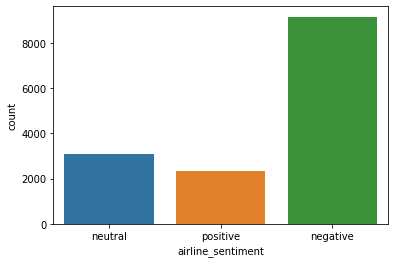

In [13]:
# Unique values of sentiment plot

ax = sns.countplot(x="airline_sentiment", data=df)

Positive and neutral tweets are almost equal.

Negative tweets are more than double of neutral or positive sentiments

**Stacked par chart to show the distribution of reviews per company**

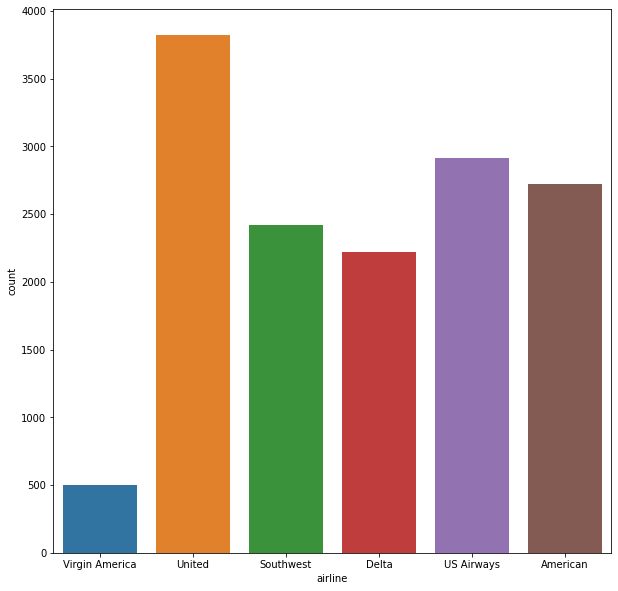

In [14]:
# Unique values of airline

plt.figure(figsize=(10,10))
ax = sns.countplot(x="airline", data=df)


In [15]:
import plotly.graph_objects as go
crosstab_sentiments=pd.crosstab(df.airline, df.airline_sentiment)
companies=list(crosstab_sentiments.index)

fig = go.Figure(data=[
    go.Bar(name=col_name, x=companies, y=list(crosstab_sentiments[col_name]))
for col_name in list(crosstab_sentiments.columns)])
# Change the bar mode
fig.update_layout(barmode='stack',
                  title='Sentiment distribution per company',
                  yaxis=dict(title='Sentiment distribution'),
                 xaxis=dict(title='Companies'))
fig.show()

we see that most of reviews are negative for most of the companies , to help these companies take better decesions we need to focus on negative reviews

**Stacked par chart to show negative reasons distributions per company**



In [16]:
crosstab_neg_reasons=pd.crosstab(df.airline,df.negativereason)
companies=list(crosstab_neg_reasons.index)

fig = go.Figure(data=[
    go.Bar(name=col_name, x=companies, y=list(crosstab_neg_reasons[col_name]))
for col_name in list(crosstab_neg_reasons.columns)])
# Change the bar mode
fig.update_layout(barmode='stack',
                  title='Negative reasons distribution per company',
                  yaxis=dict(title='Negative reasons distribution'),
                 xaxis=dict(title='Companies'))
fig.show()

**Pie plot to check the overall distribution for negative reasons**

In [17]:
labels = list(crosstab_neg_reasons.columns)
values = [crosstab_neg_reasons[col_name].sum() for col_name in labels]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title='Overall distribution for negative reasons')
fig.show()

United has the most number of flights.

Virgin America has the least.



**Dropng the neutral sentiments**


In [18]:
df.drop(df.loc[df['airline_sentiment']=='neutral'].index, inplace=True)

**Vectorization process**


In [19]:
data = df[["airline_sentiment", "text"]]
data.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


In [20]:
X = df["text"]
y = df["airline_sentiment"]

In [21]:
from sklearn.model_selection import train_test_split
Xtrain, Xvalid, ytrain, yvalid = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [23]:
tfidf = TfidfVectorizer(stop_words="english")

In [24]:
tfidf.fit(Xtrain)

TfidfVectorizer(stop_words='english')

In [25]:
print(tfidf.get_feature_names())


['00', '000', '000ft', '000lbs', '0016', '00am', '00p', '00pm', '01', '0162389030167', '0162424965446', '01pm', '02', '03', '0316', '0372389047497', '0400', '05', '0510', '05am', '05pm', '0600', '0638', '0671', '07p', '08', '0ewj7oklji', '0hxlnvzknp', '0kn7pjelzl', '0liwecasoe', '0prgysvurm', '0wbjawx7xd', '10', '100', '1000', '1001', '1002', '1007', '101', '1019', '1020', '1027', '1028', '103', '1032', '1038', '104', '105', '1050', '1051', '106', '1071', '1074', '1080', '1081', '1086', '108639', '1099', '10a', '10am', '10f', '10hrs', '10m', '10min', '10mins', '10p', '10pm', '10th', '10voucherwhatajoke', '10x', '10yr', '11', '1101', '1106', '1108', '1109', '1114', '1117', '112', '1120am', '1130', '1136', '1137', '1138', '1140', '1142', '1146', '1152', '1153', '1156', '1159', '1161', '117', '1170', '1171', '1172', '118', '1180', '1181', '11a', '11am', '11pm', '11th', '12', '120', '1200', '1212', '1217', '1219', '122', '1220', '1225', '1229', '123', '1230', '1230am', '1242', '125', '1254

In [26]:
print(tfidf.vocabulary_)

{'jetblue': 5609, 'good': 4744, 'just': 5697, 'remind': 8073, '1914': 285, 'horse': 5135, 'amp': 1529, 'buggy': 2316, 'little': 6030, 'delay': 3348, 'right': 8253, 'southwestair': 8947, 'cancelled': 2429, 'flightled': 4350, 'flight': 4326, 'rebooked': 7929, '1st': 321, 'help': 4996, 'need': 6719, 'nyc': 6949, 'schedule': 8487, 'flights': 4360, 'tomorrow': 9679, 'idea': 5230, 'caused': 2511, '1316': 134, 'fll': 4370, 'gt': 4827, 'jax': 5585, 'united': 10092, 'guys': 4852, 'suck': 9223, 'usairways': 10228, 'ok': 7010, 'thank': 9499, 'told': 9673, 'ground': 4808, 'snow': 8874, 'flighting': 4347, 'pushing': 7768, 'day': 3281, 'lose': 6113, '150': 163, 'hotel': 5142, 'trying': 9828, 'americanair': 1512, 'dfwairport': 3454, 'let': 5947, 'http': 5171, 'voxcghciji': 10383, 'truthh4': 9821, 'didn': 3470, 'wifi': 10590, 'password': 7259, 'smh': 8846, '3056': 529, 'hour': 5151, 'long': 6094, 'best': 2050, 've': 10302, 'kudos': 5818, 'crew': 3136, 'airline': 1420, 'general': 4634, 'flt': 4378, '45

In [27]:

data[data["airline_sentiment"]=="negative"]["text"]

3        @VirginAmerica it's really aggressive to blast...
4        @VirginAmerica and it's a really big bad thing...
5        @VirginAmerica seriously would pay $30 a fligh...
15           @VirginAmerica SFO-PDX schedule is still MIA.
17       @VirginAmerica  I flew from NYC to SFO last we...
                               ...                        
14631    @AmericanAir thx for nothing on getting us out...
14633    @AmericanAir my flight was Cancelled Flightled...
14634           @AmericanAir right on cue with the delays👌
14636    @AmericanAir leaving over 20 minutes Late Flig...
14638    @AmericanAir you have my money, you change my ...
Name: text, Length: 9159, dtype: object

In [28]:
count_vect = CountVectorizer(stop_words="english")
neg_matrix = count_vect.fit_transform(data[data["airline_sentiment"]=="negative"]["text"])
freqs = zip(count_vect.get_feature_names(), neg_matrix.sum(axis=0).tolist()[0])
# Sort from largest to smallest
print(sorted(freqs, key=lambda x: -x[1])[:100])

[('flight', 2937), ('united', 2899), ('usairways', 2375), ('americanair', 2091), ('southwestair', 1214), ('jetblue', 1051), ('cancelled', 921), ('service', 748), ('hours', 646), ('just', 622), ('help', 618), ('customer', 611), ('hold', 611), ('time', 596), ('plane', 530), ('delayed', 505), ('amp', 503), ('hour', 452), ('flightled', 445), ('http', 436), ('flights', 419), ('bag', 415), ('gate', 410), ('ve', 398), ('don', 388), ('late', 377), ('need', 373), ('phone', 368), ('waiting', 341), ('thanks', 315), ('got', 298), ('airline', 294), ('like', 291), ('trying', 288), ('delay', 272), ('wait', 272), ('today', 269), ('minutes', 266), ('day', 251), ('going', 250), ('bags', 245), ('luggage', 245), ('told', 245), ('airport', 244), ('people', 242), ('worst', 241), ('fly', 237), ('really', 236), ('did', 227), ('guys', 224), ('weather', 224), ('lost', 221), ('agent', 218), ('hrs', 217), ('way', 212), ('make', 211), ('change', 210), ('seat', 208), ('flighted', 205), ('want', 205), ('check', 204)

**Wordcloud for positive reasons**

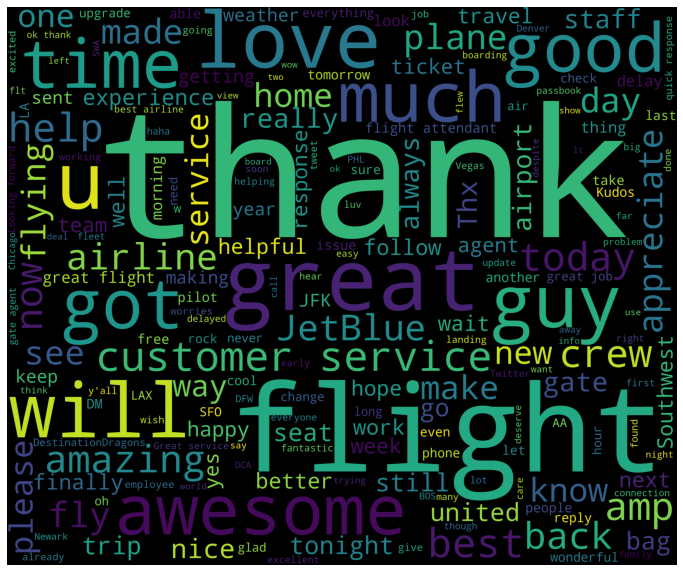

In [29]:
new_df=data[data['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word and not word.startswith('@') and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',width=3000,height=2500).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


**Wordcloud for Negative sentiments of tweets**

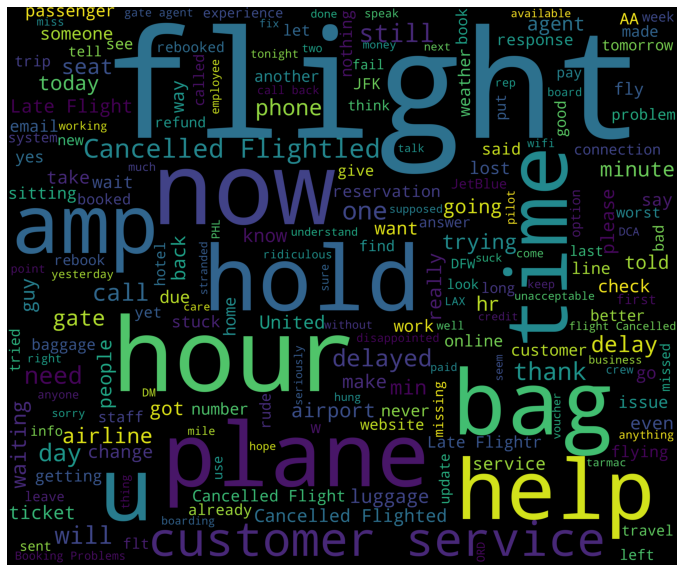

In [30]:
new_df=data[data['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word and not word.startswith('@') and word != 'RT'])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',width=3000,height=2500).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# **Dropng the rows with neutral sentiments**

In [31]:
data.drop(data.loc[data['airline_sentiment']=='neutral'].index, inplace=True)

## **label encoding on airline_sentiment**

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['airline_sentiment'])

data['airline_sentiment_encoded'] = le.transform(data['airline_sentiment'])
data.head()

,airline_sentiment,text,airline_sentiment_encoded
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


# **Preprocessing the tweet text data**

Now, we will clean the tweet text data and apply classification algorithms on it

In [33]:
def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [34]:
nltk.download('stopwords')
data['clean_tweet']=data['text'].apply(lambda x: tweet_to_words(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11513 entries, 1 to 14638
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   airline_sentiment          11513 non-null  object
 1   text                       11513 non-null  object
 2   airline_sentiment_encoded  11513 non-null  int64 
 3   clean_tweet                11513 non-null  object
dtypes: int64(1), object(3)
memory usage: 707.8+ KB


# **Vectorization**

In [36]:
x = data.clean_tweet
y = data.airline_sentiment

print(len(x), len(y))

11513 11513


## **The data is split in the standard 80,20 ratio**

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

8634 8634
2879 2879


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# instantiate the vectorizer
vect = CountVectorizer()
vect.fit(x_train)

CountVectorizer()

In [39]:
# Use the trained to create a document-term matrix from train and test sets
x_train_dtm = vect.transform(x_train)
x_test_dtm = vect.transform(x_test)

In [40]:
vect_tunned = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=0.1, max_df=0.7, max_features=100)
vect_tunned


CountVectorizer(max_df=0.7, max_features=100, min_df=0.1, ngram_range=(1, 2),
                stop_words='english')

# **Model Building**

In [41]:
#training SVM model with linear kernel
#Support Vector Classification-wrapper around SVM
from sklearn.svm import SVC
model = SVC(kernel='linear', random_state = 10)
model.fit(x_train_dtm, y_train)
#predicting output for test data
pred = model.predict(x_test_dtm)

In [42]:
#accuracy score
accuracy_score(y_test,pred)

0.8996179228898923

In [43]:
#building confusion matrix
cm = confusion_matrix(y_test, pred)
cm

array([[2169,  112],
       [ 177,  421]])

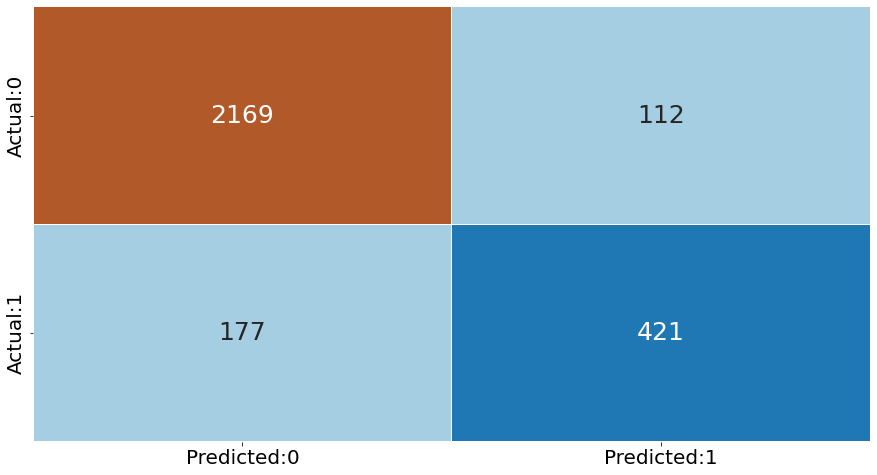

In [44]:
#defining the size of the canvas
plt.rcParams['figure.figsize'] = [15,8]
#confusion matrix to DataFrame
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1',], index = ['Actual:0','Actual:1',])
#plotting the confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Paired', cbar = False,linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [49]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

    negative       0.92      0.95      0.94      2281
    positive       0.79      0.70      0.74       598

    accuracy                           0.90      2879
   macro avg       0.86      0.83      0.84      2879
weighted avg       0.90      0.90      0.90      2879



* As we you can see above we have plotted the confusion matrix for predicted sentiments and actual sentiments (negative and positive)
* SVM Classifier gives us the best accuracy score i.e 91% precision scores according to the classification report.
* The confusion matrix shows the TP,TN,FP,FN for sentiments(negative, positive)


